In [2]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

coord = SkyCoord(ra=280, dec=-60, unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(0.1, u.deg)
height = u.Quantity(0.1, u.deg)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)
df = r.to_pandas()

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
INFO: Query finished. [astroquery.utils.tap.core]


/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3343: TableReplaceWarning: converted column 'priam_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3343: TableReplaceWarning: converted column 'flame_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
headings =['dist', 'solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error','radial_velocity', 'radial_velocity_error']
df = df[headings]

In [4]:
df.head()

,dist,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,radial_velocity,radial_velocity_error
0,0.002603,1635721458409799680,b'Gaia DR2 6636090334814214528',6636090334814214528,1176213019,2015.5,280.000254,0.298613,-60.002595,0.328609,-0.311098,0.465901,NaN,NaN
1,0.003852,1635721458409799680,b'Gaia DR2 6636090339113063296',6636090339113063296,570813457,2015.5,280.005117,0.050241,-59.997111,0.055698,2.144590,0.086866,NaN,NaN
2,0.004545,1635721458409799680,b'Gaia DR2 6636090334814217600',6636090334814217600,102584636,2015.5,279.994699,0.165214,-59.996305,0.186424,0.968816,0.250439,NaN,NaN
3,0.005614,1635721458409799680,b'Gaia DR2 6636089583198816640',6636089583198816640,443622133,2015.5,280.006179,0.054410,-60.004685,0.057730,0.384821,0.085113,NaN,NaN
4,0.005846,1635721458409799680,b'Gaia DR2 6636090334814218752',6636090334814218752,979091127,2015.5,280.001274,0.619543,-59.994182,0.660207,0.132777,0.819871,NaN,NaN


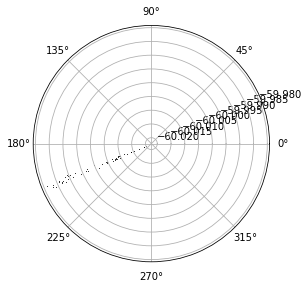

In [11]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#ra = [x / 180.0 * 3.141593 for x in ra]
fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(4, 2)
# Position plot in figure using gridspec.
ax = plt.subplot(gs[0], polar=True)
#ax.set_ylim(180, 225)

ax.scatter(df.ra, df.dec, marker='o', c='k', s=1, lw=0.)